In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(patchwork)
library(ggplot2)
setwd("~/dev/CCRItask")


Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Load the integrated data

In [2]:
integrated <- readRDS("data/processed/integrated.rds")

## Perfrom Clustering

In [4]:
integrated <- FindNeighbors(integrated, dims = 1:30)
integrated <- FindClusters(integrated, resolution = 0.1) 

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19803
Number of edges: 805203

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9772
Number of communities: 12
Elapsed time: 2 seconds


In [5]:
head(integrated[[]])

,orig.ident,nCount_RNA,nFeature_RNA,sample,week,sample_id,gsm_id,condition,percent.mt,S.Score,G2M.Score,Phase,CC.Difference,integrated_snn_res.0.1,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<fct>
AAACGAAGTCGCAACC-1_1,week8_001,19833,4507,week8_001,8,001,GSM4446535,regular,9.716130,-0.01013380,-0.1543011,G1,0.14416732,1,1
AAACGCTGTATTCCGA-1_1,week8_001,5589,2236,week8_001,8,001,GSM4446535,regular,3.954196,-0.08416841,-0.1833235,G1,0.09915505,8,8
AAAGAACAGCAGGCAT-1_1,week8_001,3190,1568,week8_001,8,001,GSM4446535,regular,1.818182,-0.09471201,-0.1751724,G1,0.08046040,0,0
AAAGGATAGAGTTGCG-1_1,week8_001,6259,2271,week8_001,8,001,GSM4446535,regular,4.649305,-0.04643296,-0.2688638,G1,0.22243079,0,0
AAAGGATTCTAGCATG-1_1,week8_001,4952,2206,week8_001,8,001,GSM4446535,regular,4.886914,-0.13126361,-0.2573361,G1,0.12607253,8,8
AAAGGGCAGCAATAAC-1_1,week8_001,5899,2103,week8_001,8,001,GSM4446535,regular,3.492117,-0.04142766,-0.1686783,G1,0.12725061,10,10


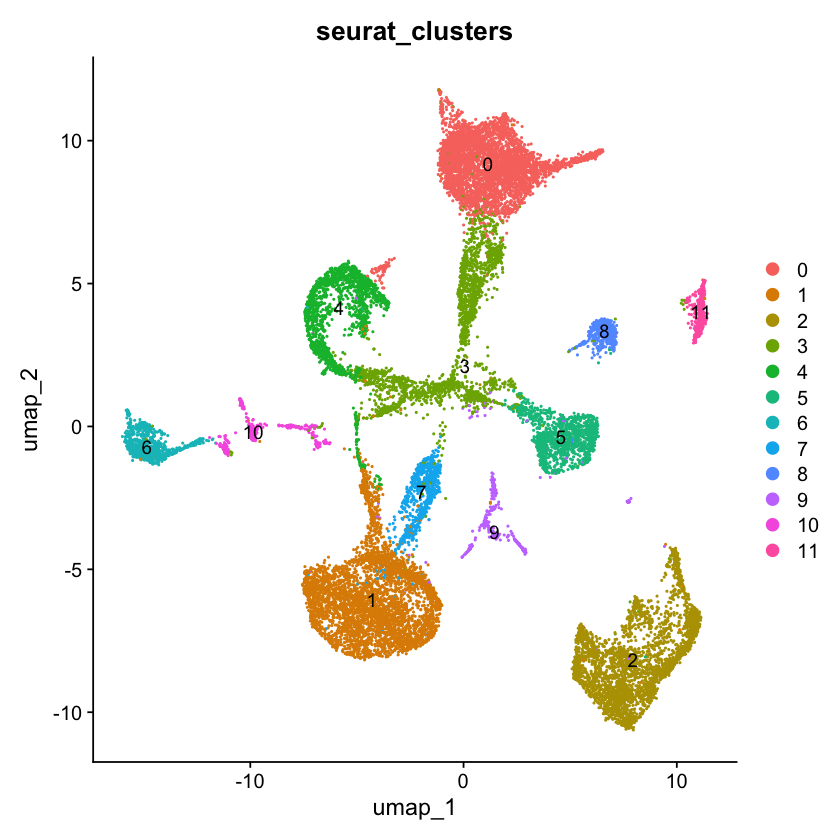

In [11]:
DimPlot(integrated,reduction = "umap", group.by = "seurat_clusters", label = TRUE)

## Cluster annotation

From the https://www.nature.com/articles/s41588-021-00818-x

In [7]:
cell_type_markers <- list(
  "SCPs" = c("SOX10", "PLP1", "FOXD3"),
  "Chromaffin cells" = c("ELAVL3", "ELAVL4", "PHOX2B", "TH"),
  "Sympathoblasts" = c("STMN2"),
  "Adrenal gland cortex" = c("NR5A1"),
  "Melanocytes" = c("MITF"),
  #"Kidney" = c("PAX2"),
  "Subepicardial and abdominal mesenchyme" = c("PRRX1"),
  "Endothelium" = c("PECAM1", "KDR"),
  "Intermediate mesoderm" = c("GATA4", "HAND2"),
  #"Liver" = c("HNF4A", "AHSG"),
  "HSCs" = c("SPINK2"), # AZU1
  "Immune cells" = c("FCGR1A", "CD163"),
  "Erythroid cells" = c("HBA2", "HBB")
)

markers_unique  = unique(unlist(cell_type_markers))


In [8]:
length(unique(unlist(cell_type_markers)))

[1] 20

## Dotplot to map clusters to cell types

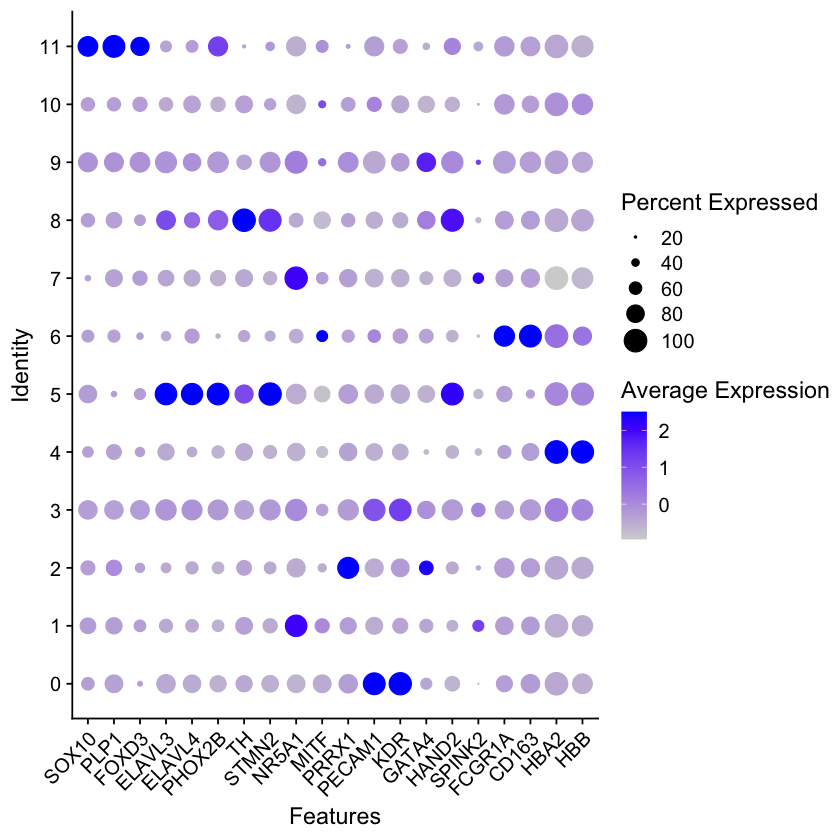

In [9]:
DotPlot(integrated, features = unique(unlist(cell_type_markers))) + RotatedAxis()

in depth analysis for manual annotation

SCPs

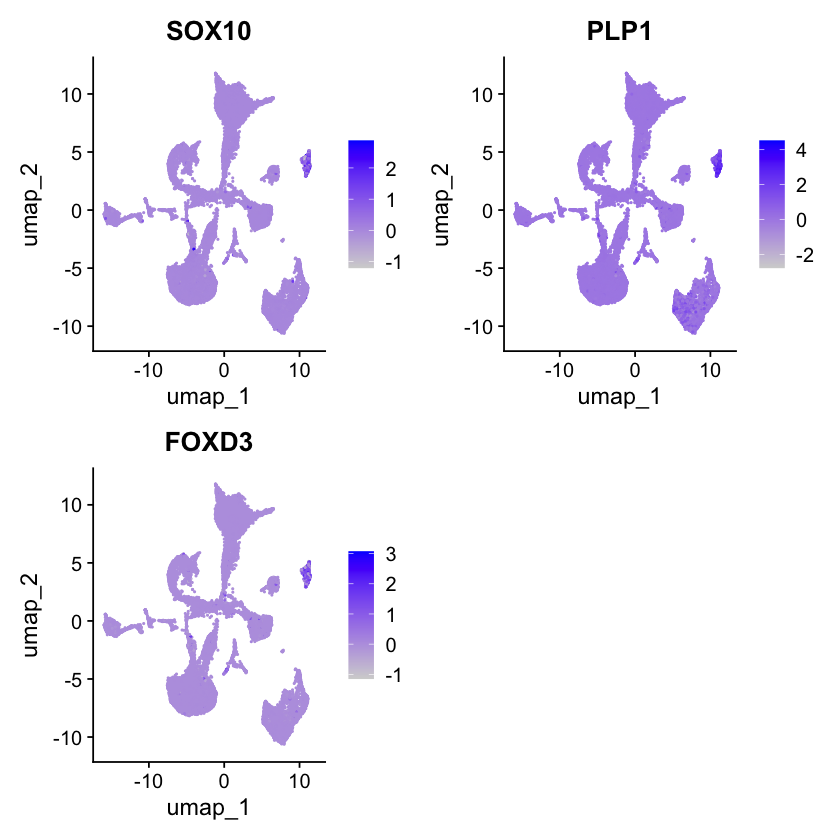

In [12]:
FeaturePlot(integrated, c("SOX10", "PLP1", "FOXD3"), ncol=2, raster.dpi = c(800,100))

chromaffin cells

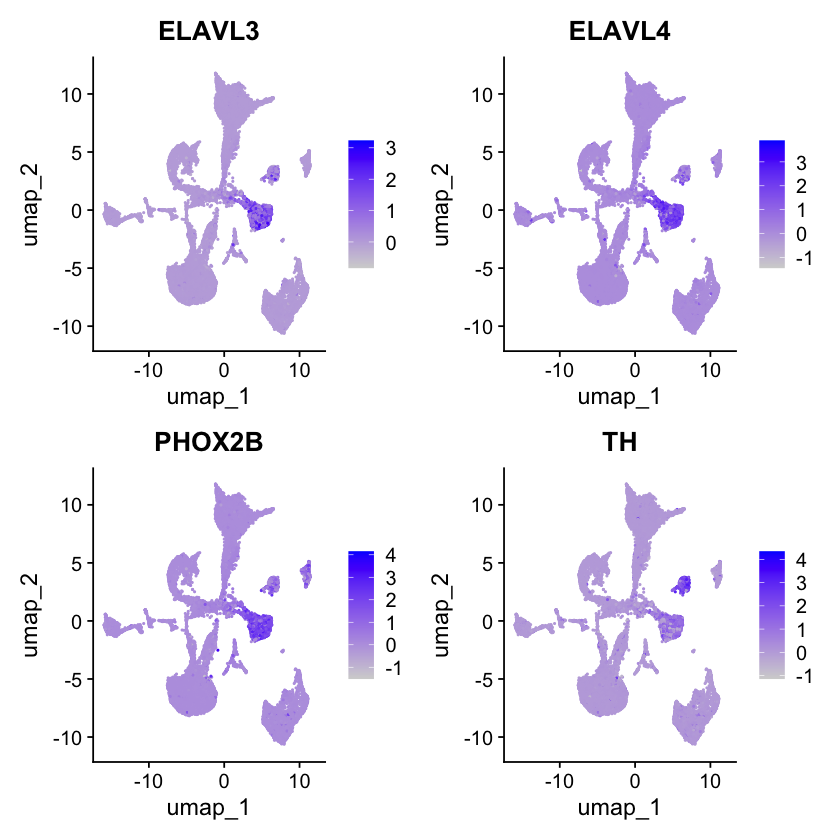

In [13]:
FeaturePlot(integrated, c("ELAVL3", "ELAVL4", "PHOX2B", "TH"), ncol=2, raster.dpi = c(800,100))

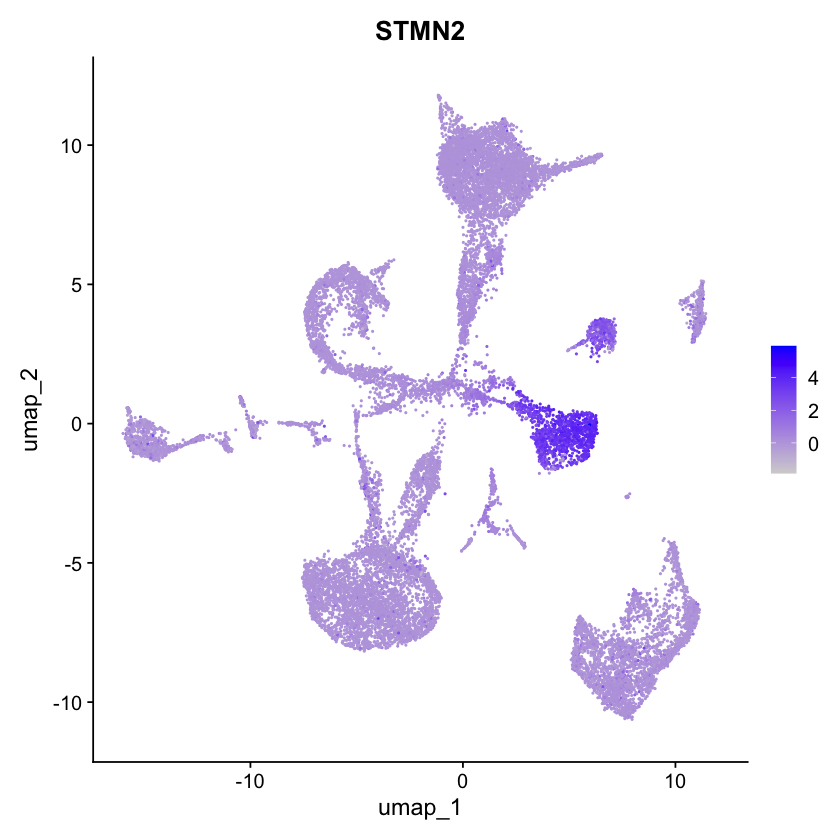

In [14]:
FeaturePlot(integrated, c("STMN2"), ncol=1, raster.dpi = c(800,100))

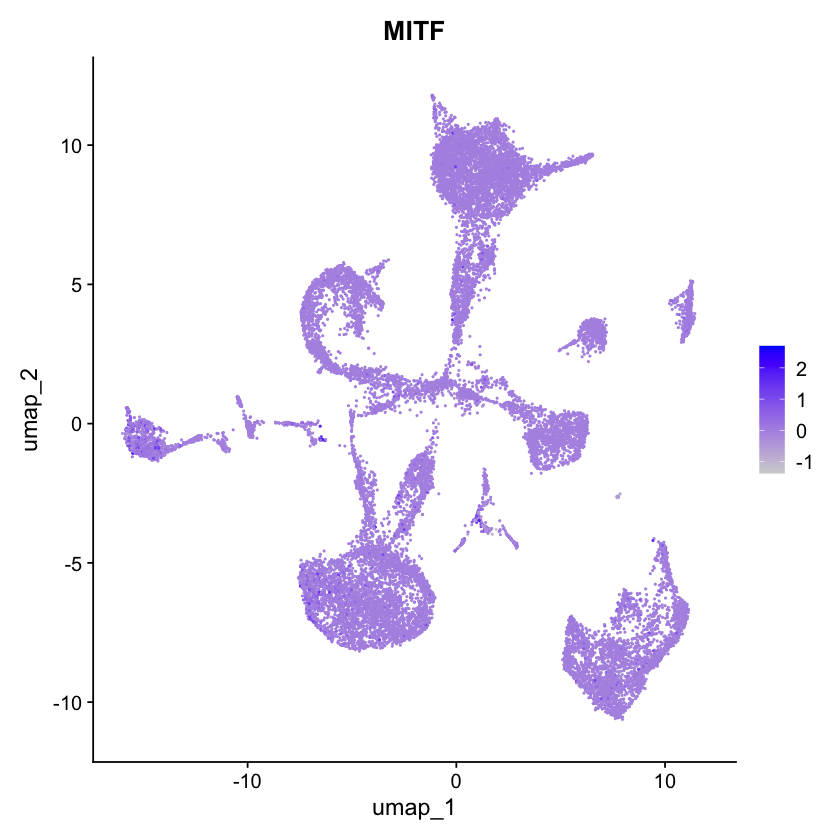

In [15]:
FeaturePlot(integrated, c("MITF"), ncol=1, raster.dpi = c(800,100))

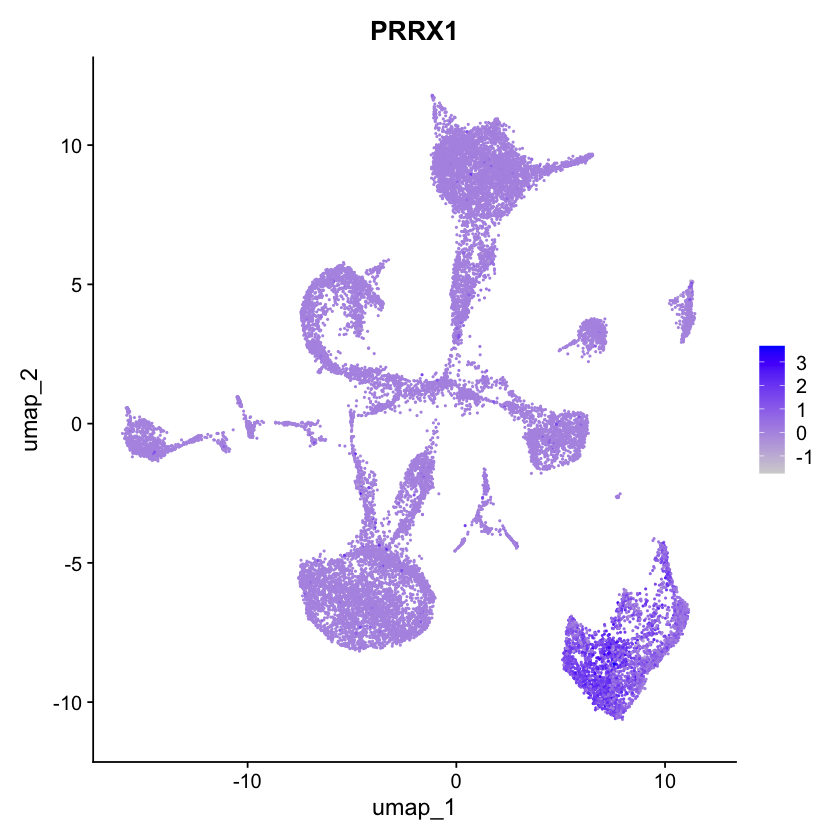

In [17]:
FeaturePlot(integrated, c("PRRX1"), ncol=1, raster.dpi = c(800,100))

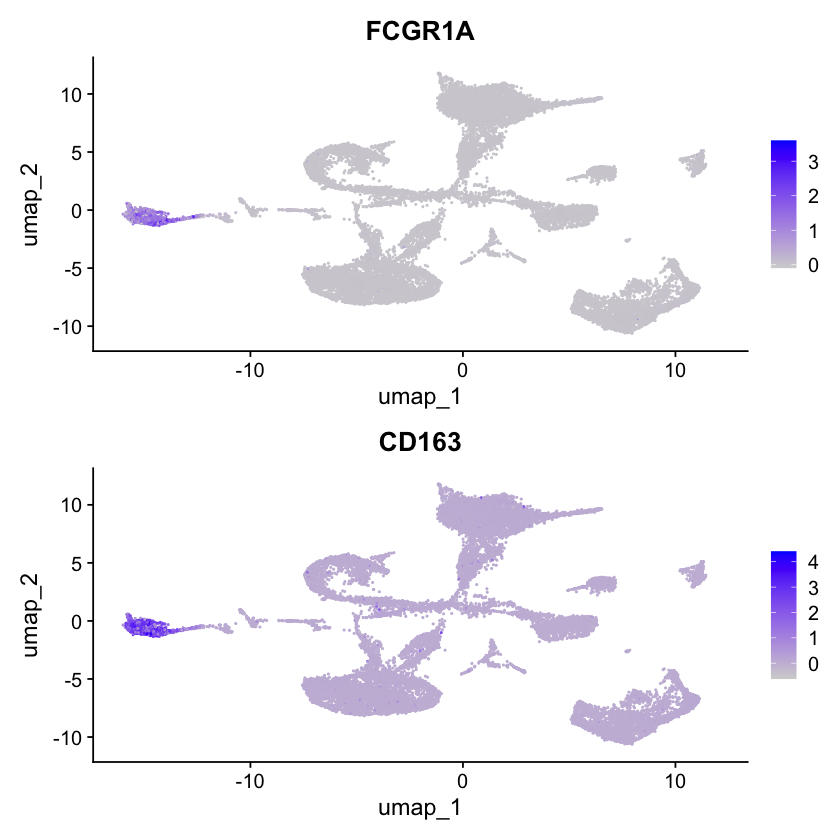

In [20]:
FeaturePlot(integrated, c("FCGR1A", "CD163"), ncol=1, raster.dpi = c(800,100))


In [21]:
cluster <- list(
  "11" = "SCPs", #= c("SOX10", "PLP1", "FOXD3"),
  "8" = "Chromaffin cells", #= c("ELAVL3", "ELAVL4", "PHOX2B", "TH"),
  "5"= "Sympathoblasts", #= c("STMN2"),
  "1" = "Adrenal gland cortex", #= c("NR5A1"),
  # "6" = "Melanocytes", #= c("MITF"),
  #"Kidney" = c("PAX2"),
  "2" = "Subepicardial and abdominal mesenchyme",# = c("PRRX1"),
  "0" = "Endothelium", #= c("PECAM1", "KDR"),
  "3" = "Intermediate mesoderm", #c("GATA4", "HAND2"),
  #"Liver" = c("HNF4A", "AHSG"),
  "7"= "HSCs", #c("SPINK2"), # AZU1
  "6" = "Immune cells", #= #c("FCGR1A", "CD163"),
  "4" = "Erythroid cells" #= #c("HBA2", "HBB")
)


In [22]:
# Convert list to a character vector for easier handling
cluster <- unlist(cluster)

# Rename the identities in your Seurat object
integrated <- RenameIdents(integrated, cluster)

# (Optional) Save the renamed cluster identities as metadata
integrated$celltype <- Idents(integrated)

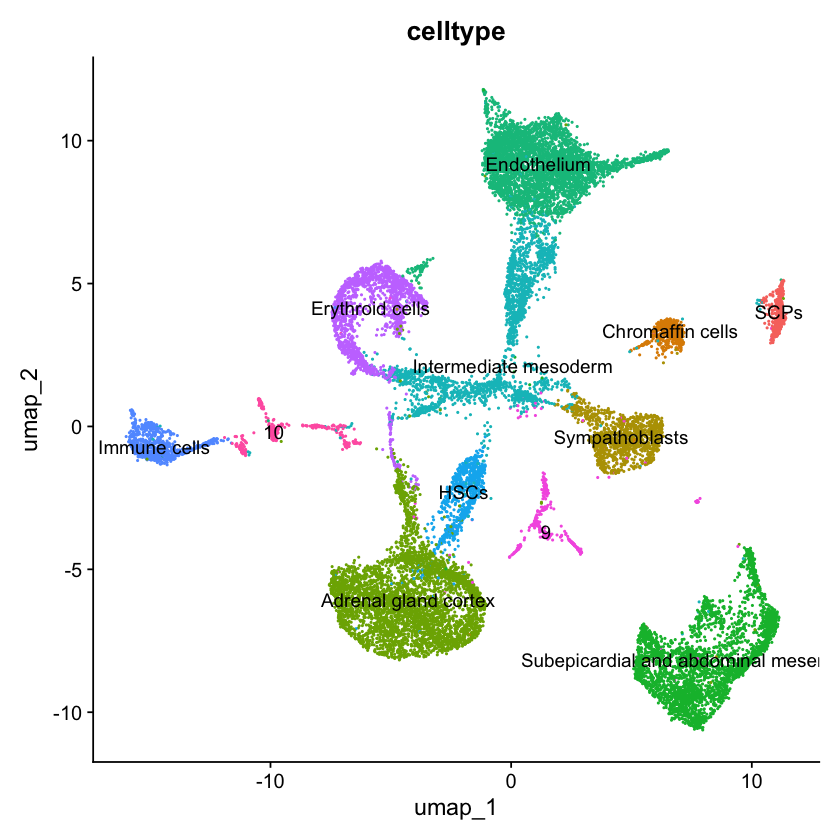

In [23]:
umap_ann <- DimPlot(integrated, group.by = "celltype", label = TRUE) + NoLegend()
umap_ann

In [24]:
ggsave("plots/umap_annotated.pdf", umap_ann, width = 10, height = 10)

## Automatic cluster annotation

did not work properly

In [25]:
# Score each cell for each cell type based on marker genes
integrated <- AddModuleScore(
  integrated,
  features = cell_type_markers,
  name = names(cell_type_markers),
  ctrl = 20,  # Reduce from default 100 if needed
  replace = TRUE
)

In [26]:

install.packages('devtools')
devtools::install_github('immunogenomics/presto')


The downloaded binary packages are in
	/var/folders/wl/jrkngsm57b944tj7rtjg12000000gn/T//Rtmp3lmekZ/downloaded_packages


Using GitHub PAT from the git credential store.

Skipping install of 'presto' from a github remote, the SHA1 (7636b3d0) has not changed since last install.
  Use `force = TRUE` to force installation



## Dot Plot for top5 markers for each cluster

In [27]:
# Find all markers for each cluster
markers <- FindAllMarkers(object = integrated,
                          only.pos = TRUE,    # Only consider positive markers
                          min.pct = 0.25,     # Minimum detection fraction
                          logfc.threshold = 0.25)  # Minimum log fold change

Calculating cluster SCPs

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Chromaffin cells

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Sympathoblasts

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Adrenal gland cortex

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Subepicardial and abdominal mesenchyme

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Endothelium

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Intermediate mesoderm

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster HSCs

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculat

In [28]:
head(markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
PTPRZ1,1.063855e-243,6.412992,0.990,0.783,2.127709e-240,SCPs,PTPRZ1
ERBB3,1.696545e-233,8.156112,0.972,0.566,3.393090e-230,SCPs,ERBB3
DST,5.987636e-231,3.781085,1.000,0.891,1.197527e-227,SCPs,DST
PLP1,7.904205e-229,7.297576,0.970,0.727,1.580841e-225,SCPs,PLP1
TRPM3,3.513331e-227,7.403232,0.970,0.622,7.026663e-224,SCPs,TRPM3
MPZ,1.720136e-225,8.064614,0.965,0.670,3.440272e-222,SCPs,MPZ


In [42]:
# Get top 5 markers per cluster
top5 <- markers %>% 
  group_by(cluster) %>% 
  top_n(n = 5, wt = avg_log2FC)%>%
  arrange(cluster, desc(avg_log2FC))

In [43]:
head(top5)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.150230e-221,8.924888,0.952,0.516,2.300459e-218,SCPs,CDH19
5.514697e-88,8.242869,0.656,0.437,1.102939e-84,SCPs,INSC
1.696545e-233,8.156112,0.972,0.566,3.393090e-230,SCPs,ERBB3
6.326074e-136,8.108642,0.824,0.519,1.265215e-132,SCPs,FOXD3
1.720136e-225,8.064614,0.965,0.670,3.440272e-222,SCPs,MPZ
1.815618e-113,8.241624,0.735,0.382,3.631235e-110,Chromaffin cells,GIP


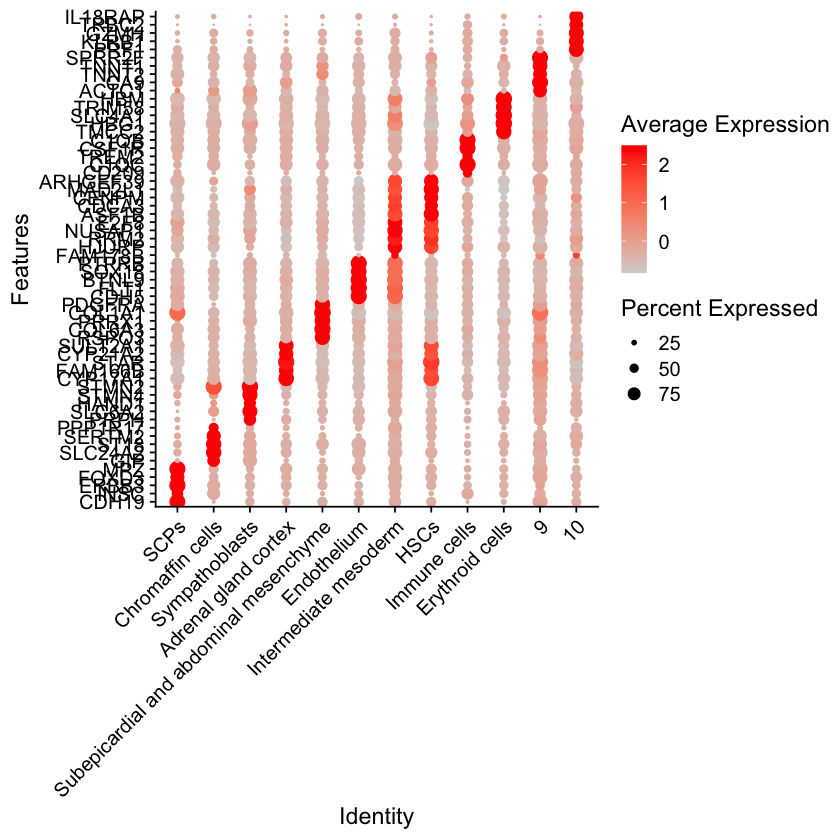

In [44]:
# Create dot plot
dp <- DotPlot(object = integrated, 
        features = unique(top5$gene),  # Use the unique genes from top5
        cols = c("lightgrey", "red"), # to match the paper
        dot.scale = 4) +               # Adjust dot size

  coord_flip()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
dp

In [45]:
ggsave("plots/dotplot_top5_perCluster.pdf", dp, width = 8, height = 16)

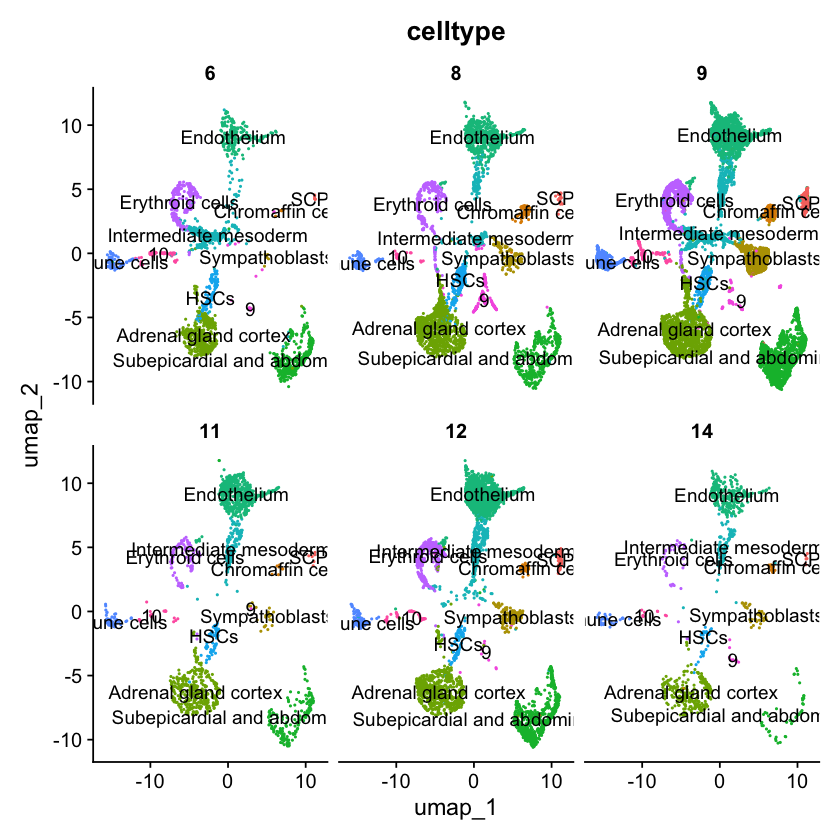

In [51]:
umap_ann_week <- DimPlot(integrated, group.by = "celltype", label = TRUE, split.by = "week", ncol=3) + NoLegend()
ggsave("plots/umap_ann_week.png", width = 10, height = 10)
umap_ann_week


In [52]:
saveRDS(integrated, "data/processed/integrated_annotated.rds")
